In [1]:
#visualize end_to_end dataset as wavefield

In [8]:
from models.model_utils import fetch_data_end_to_end
from generate_data import wave_util
import matplotlib.pyplot as plt
import torch

f_delta_x = .06
dx = 2.0/128.0

#get data
path = "../data/end_to_end_bp_m_200_2000.npz"
loaders = fetch_data_end_to_end([path], shuffle=False, batch_size=1)

test data points: 200


0 ------------------------------------------------------------------------------------------------------------------------------------------------------


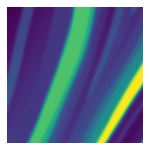

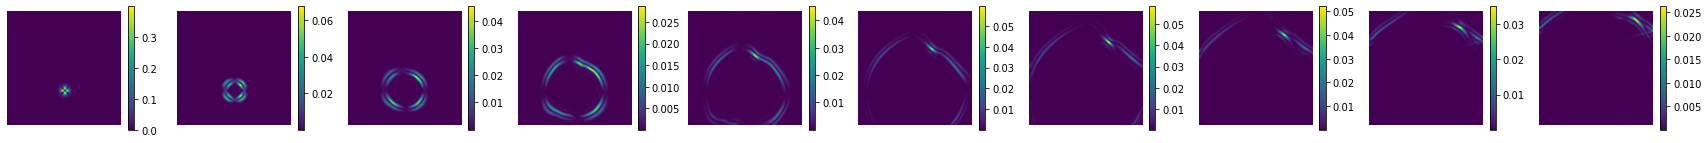

1 ------------------------------------------------------------------------------------------------------------------------------------------------------


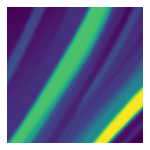

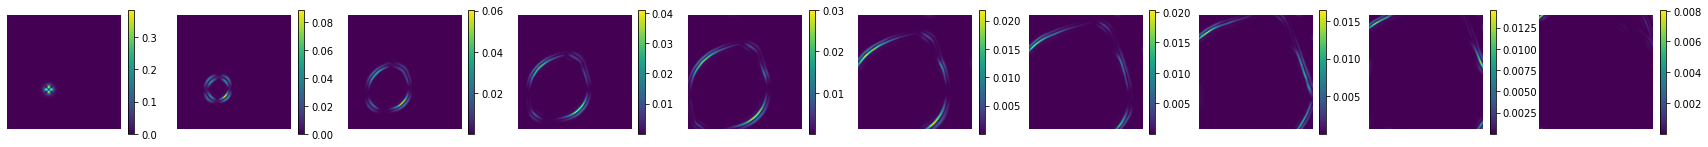

2 ------------------------------------------------------------------------------------------------------------------------------------------------------


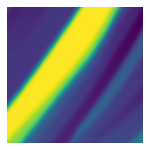

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 

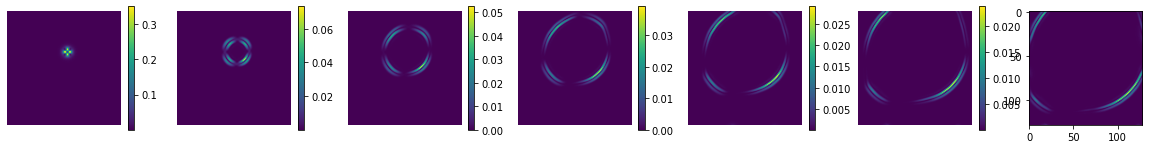

In [14]:
for loader in loaders:
    for i, data in enumerate(loader):
        print(i, "-"*150)

        input = data[0]  # b x n_snaps x c x w x h

        # velocity visualization
        plt.figure(figsize = (2.5,2.5))
        plt.imshow(input[0, 0, 3, :, :])
        plt.axis('off')
        plt.show()
        fig = plt.figure(figsize=(30,5))

        for idx in range(10):

            #input vis
            u_x, u_y, u_t_c, vel = input[:,idx, 0, :, :], input[:,idx, 1, :, :], input[:,idx, 2, :, :], input[:,idx, 3, :, :]
            sumv = torch.sum(torch.sum(u_x))
            u, ut = wave_util.WaveSol_from_EnergyComponent_tensor(u_x, u_y, u_t_c, vel, f_delta_x, sumv)

            ax1 = fig.add_subplot(2,10,idx+1)
            pos1 = ax1.imshow(wave_util.WaveEnergyField_tensor(u[0,:,:],ut[0,:,:],vel[0,:,:],dx)*dx*dx)
            plt.colorbar(pos1)
            plt.axis('off')

            # #label vis
            # u_x, u_y, u_t_c, vel = input[:,idx+1, 0, :, :], input[:,idx+1, 1, :, :], input[:,idx+1, 2, :, :], input[:,idx+1, 3, :, :]
            # sumv = torch.sum(torch.sum(u_x))
            # u, ut = wave_util.WaveSol_from_EnergyComponent_tensor(u_x, u_y, u_t_c, vel, f_delta_x, sumv)
            #
            # ax2 = fig.add_subplot(2,10,idx+11)
            # pos2 = ax2.imshow(wave_util.WaveEnergyField_tensor(u[0,:,:],ut[0,:,:],vel[0,:,:],dx)*dx*dx)
            # plt.colorbar(pos2)
            # plt.axis('off')


        plt.show()

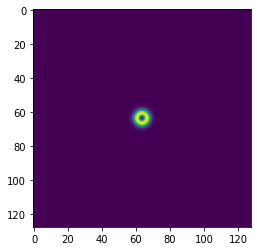

77


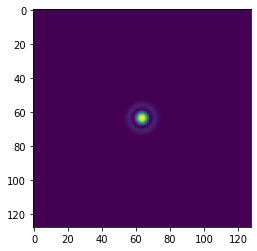

77


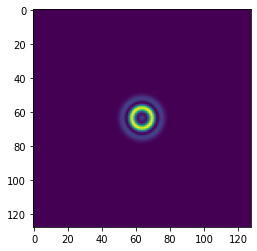

77


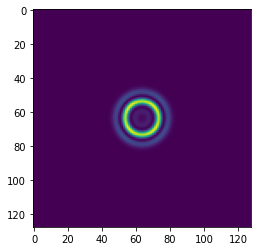

77


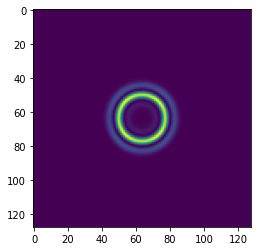

77


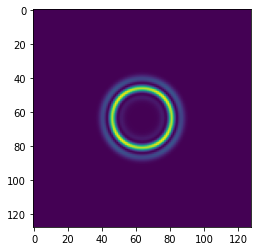

77


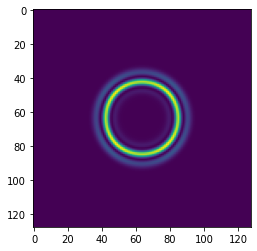

77


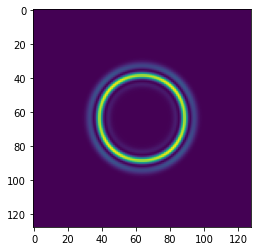

77


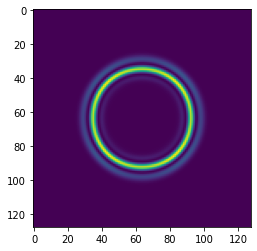

77


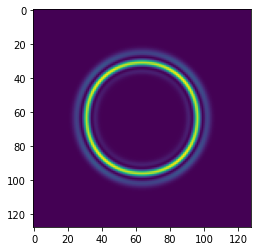

77


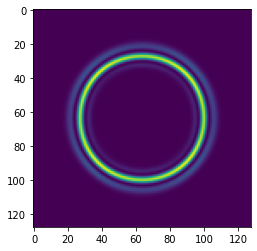

77


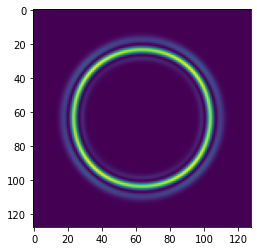

77


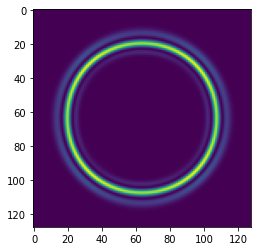

77


In [7]:
# visualize absorbing boundary conditions

import matplotlib.pyplot as plt
from generate_data import wave_propagation as wprop
import torch

xx,yy = torch.meshgrid(torch.linspace(-1, 1, 128), torch.linspace(-1, 1, 128))
u=torch.exp(-250 * ((xx) ** 2 + (yy) ** 2))#.unsqueeze(dim=0)
ut=torch.zeros([128,128])#.unsqueeze(dim=0)
vel = torch.ones(128, 128)#.unsqueeze(dim=0)

dx = 2.0/128.0
dt = dx / 20
cT = .06

for i in range(13):
    plt.imshow(wave_util.WaveEnergyField_tensor(u,ut,vel,dx))
    plt.show()
    u, ut = wprop.velocity_verlet_tensor(u, ut, vel,dx,dt,cT,boundary_c='periodic')

In [ ]:
# visualize velocity verlet differences
from models.model_utils import get_params, get_paths

data_paths, train_logger_path, valid_logger_path, dir_path_save = get_paths()
param_dict = get_params("0")

